<a href="https://colab.research.google.com/github/NanduRaj/ML/blob/master/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [0]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE

### Utilities

In [0]:
def plot_decision_boundary(dmred, data):
    data_transformed = dmred.fit_transform(data.loc[:, 'Pregnancies':'Age'])
    lr = LogisticRegression().fit(data_transformed, data.loc[:, 'Outcome'])
    max_min = (data_transformed.max(axis=0), data_transformed.min(axis=0))
    points_x=[x for x in range(int(max_min[1][0]) - 10,int(max_min[0][0]) + 10)]
    line_bias = lr.intercept_
    line_w = lr.coef_.T
    points_y = [(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]
    plt.plot(points_x, points_y)
    plt.scatter(data_transformed[:,0], data_transformed[:,1],c=data.loc[:, 'Outcome'])

### Importing the dataset

In [0]:
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking the missing values

In [0]:
dataset.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
data_pre = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
data_pre.replace({0: numpy.NaN},inplace=True)
data_pre = data_pre.fillna(dataset.mean())
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_pre[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
dataset

/home/ubuntu/.local/lib/python3.6/site-packages/pandas/core/frame.py:4258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [0]:
#determining the predictors/features(X) and response/class label(y)
x = dataset.iloc[:, 0:7].values
y = dataset.iloc[:, 8].values
x

array([[  6.        , 148.        ,  72.        , ...,  79.79947917,
         33.6       ,   0.627     ],
       [  1.        ,  85.        ,  66.        , ...,  79.79947917,
         26.6       ,   0.351     ],
       [  8.        , 183.        ,  64.        , ...,  79.79947917,
         23.3       ,   0.672     ],
       ...,
       [  5.        , 121.        ,  72.        , ..., 112.        ,
         26.2       ,   0.245     ],
       [  1.        , 126.        ,  60.        , ...,  79.79947917,
         30.1       ,   0.349     ],
       [  1.        ,  93.        ,  70.        , ...,  79.79947917,
         30.4       ,   0.315     ]])

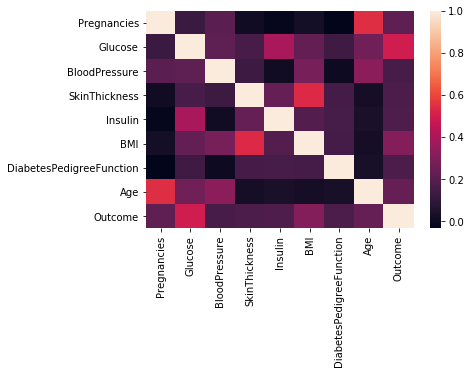

In [0]:
# Correlation among all attribute
sns.heatmap(dataset.corr())
plt.show()

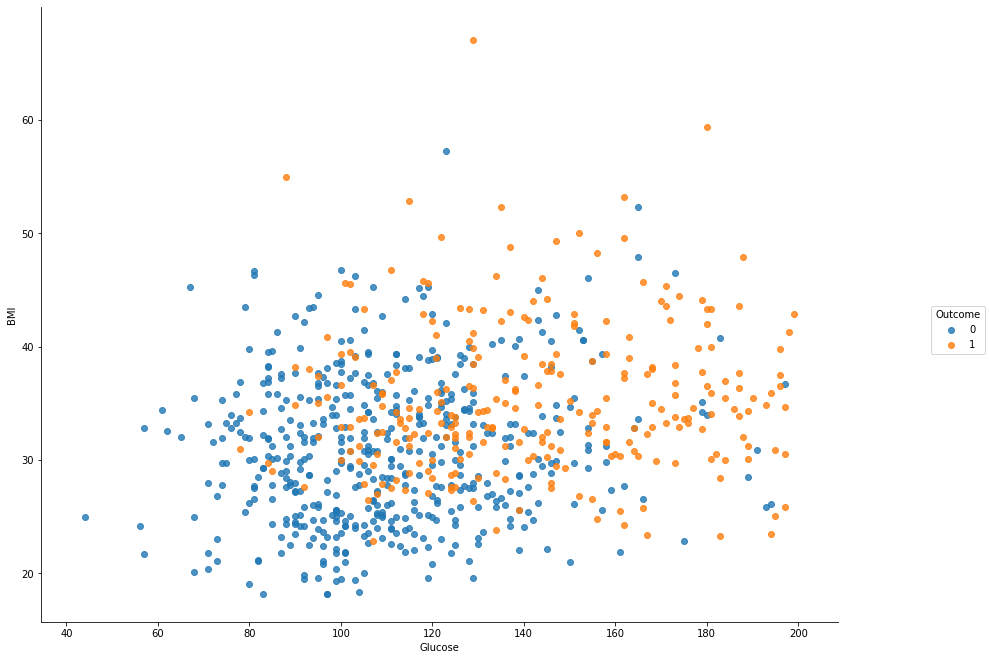

In [0]:
sns.lmplot('Glucose','BMI',dataset,hue='Outcome',fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

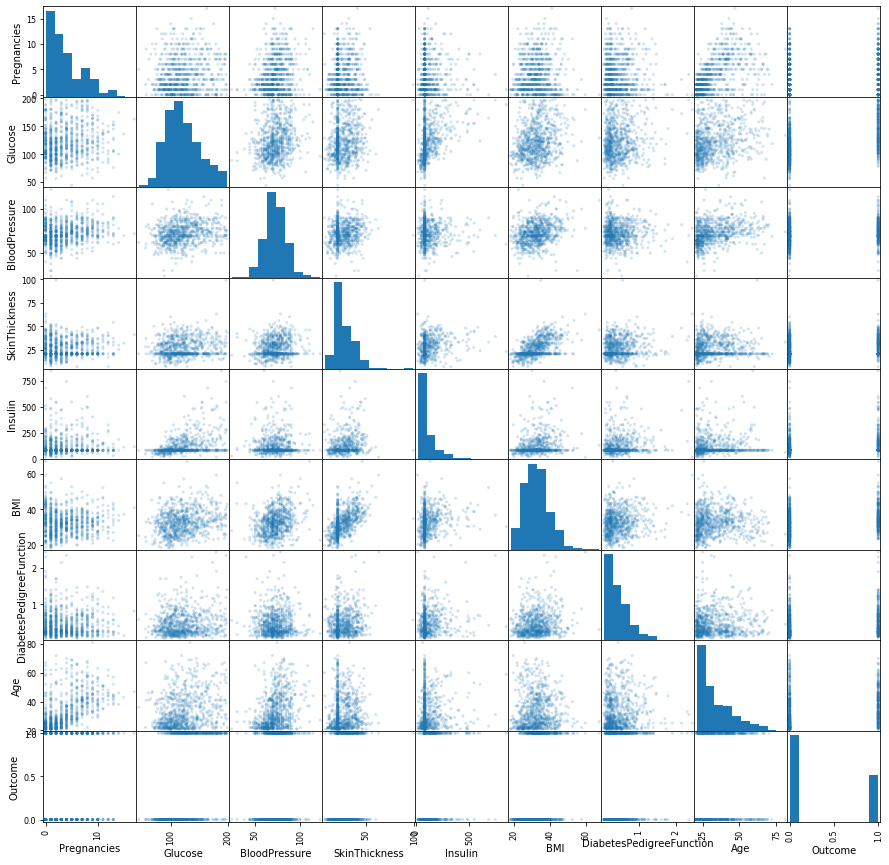

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.2, figsize=(15, 15))
plt.show()

### Splitting the dataset into the Training set and Test set

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [0]:
# Feature Scaling
#Standardize features by removing the mean(=0) and scaling to unit variance
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
# Fitting Logistic Regression to the Training set
lr = LogisticRegression()
model = lr.fit(x_train, y_train)

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred= (y_pred > 0.5).astype(int)
MSE = mean_squared_error(y_test, y_pred)    
print(MSE)

0.21875


In [0]:
from sklearn import model_selection
# 10 - fold Cross validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.767


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [0]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.78125


In [0]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix : \n" + str(cm))

Confusion matrix : 
[[113  10]
 [ 32  37]]


### Plotting decision boundary using dimensionality reduction techniques PCA and TSNE

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


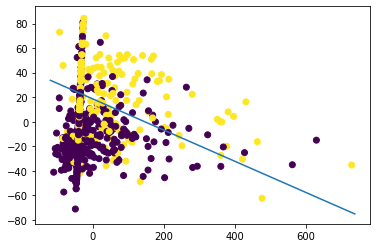

In [0]:
pca = PCA(n_components=2)
plot_decision_boundary(pca, dataset)

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


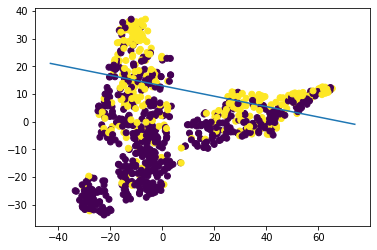

In [0]:
tsne = TSNE(n_components=2)
plot_decision_boundary(tsne, dataset)

by 
 [*Nandu Raj, Dexlock*](https://www.linkedin.com/in/nandu-raj-548733147/)

